## **TASK I:**

In [37]:
#to make sure we have access to NVIDIA GPU devices
!nvidia-smi

Sun Nov 12 14:01:54 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [38]:
#Installation of YOLOv8
!pip install ultralytics

from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 392, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://d

In [6]:
import glob
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!pwd   #check present working directory

/content


In [7]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Images/Surveillance/train

/content/gdrive/MyDrive/Colab Notebooks/Images/Surveillance/train


In [8]:
!ls   #Accessing the dataset

images	labels


In [9]:
img = Image.open('images/10600_png.rf.f34cf0b249b0711d99f4b775168c647d.jpg')

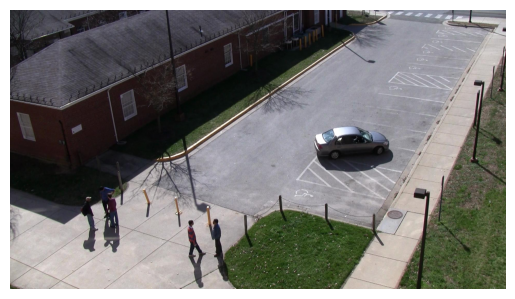

In [10]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [36]:
from ultralytics import YOLO

from IPython.display import display, Image

ModuleNotFoundError: ignored

In [ ]:
# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="coco128.yaml", epochs=3)  # train the model
metrics = model.val()  # evaluate model performance on the validation set
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
path = model.export(format="onnx")  # export the model to ONNX format

In [12]:
# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="coco128.yaml", epochs=10, lr0=0.01)  # train the model



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79d7c6e17eb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,

In [5]:
import albumentations as A

#Data Augmentations
transform = A.Compose([A.HorizontalFlip(p = 0.5),
                       A.RandomBrightnessContrast(p = 0.2),
                       A.Rotate(limit = 40),
                       A.HueSaturationValue(hue_shift_limit = 20, sat_shift_limit = 30, val_shift_limit = 50, p = 0.5)])

import numpy as np
img_ann = transform(image = np.array(Image.open('https://ultralytics.com/images/bus.jpg')))['image']

AttributeError: ignored

In [13]:
metrics = model.val(batch=1, imgsz=640)  # evaluate model performance on the validation set

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [00:04<00:00, 28.28it/s]
                   all        128        929      0.727       0.62        0.7      0.524
                person        128        254      0.822      0.677      0.779      0.565
               bicycle        128          6      0.879      0.333      0.381      0.317
                   car        128         46      0.664      0.217       0.31      0.186
            motorcycle        128          5      0.689        0.8      0.906      0.711
              airplane        128          6      0.749          1      0.955      0.777
             

In [14]:
results = model("images/10600_png.rf.f34cf0b249b0711d99f4b775168c647d.jpg")  # predict on an image


image 1/1 /content/gdrive/MyDrive/Colab Notebooks/Images/Surveillance/train/images/10600_png.rf.f34cf0b249b0711d99f4b775168c647d.jpg: 384x640 9 persons, 1 car, 122.5ms
Speed: 3.2ms preprocess, 122.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
!yolo task=detect mode=predict model=yolov8n.pt source="images/1.jpg"

In [ ]:
#yolo predict model=yolov8n-seg.pt source='https://youtu.be/LNwODJXcvt4' imgsz=320

results_video = model.predict(source='https://www.youtube.com/watch?v=fup-jRZKd1M', imgsz=320)

# TASK II:

In [18]:
#make sure we have access to NVIDIA GPU devices
#!nvidia-smi
#Install YOLOv8
#!pip install ultralytics

In [1]:
#mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [20]:
%cd '/content/gdrive/MyDrive/Colab Notebooks/Images/FaceMaskDetection/FaceMaskDetection/face_mask_detection_yolov5/face_data/train'

/content/gdrive/MyDrive/Colab Notebooks/Images/FaceMaskDetection/FaceMaskDetection/face_mask_detection_yolov5/face_data/train


In [21]:
#Accessing the data
!ls '/content/gdrive/MyDrive/Colab Notebooks/Images/FaceMaskDetection/FaceMaskDetection/face_mask_detection_yolov5/face_data'
!ls '/content/gdrive/MyDrive/Colab Notebooks/Images/FaceMaskDetection/FaceMaskDetection/face_mask_detection_yolov5/face_data/train'

dataset.yaml  train  val
images	labels


In [22]:
#YOLOv8 format
import numpy as np
import cv2

image = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Images/FaceMaskDetection/FaceMaskDetection/face_mask_detection_yolov5/face_data/train/images/image_1.jpg')
height = np.size(image, 0)
width = np.size(image, 1)
print('Shape of image from train data {} {}'.format(height,width))

image = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Images/FaceMaskDetection/FaceMaskDetection/face_mask_detection_yolov5/face_data/val/images/image_500.jpg')
height = np.size(image, 0)
width = np.size(image, 1)
print('Shape of image from validation data {} {}'.format(height,width))


Shape of image from train data 183 276
Shape of image from validation data 408 612


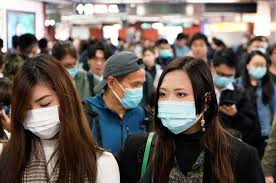

In [23]:
from IPython.display import Image
Image(filename = '/content/gdrive/MyDrive/Colab Notebooks/Images/FaceMaskDetection/FaceMaskDetection/face_mask_detection_yolov5/face_data/train/images/image_1.jpg')

In [34]:
from albumentations.core.serialization import yaml
%cd '/content/gdrive/MyDrive/Colab Notebooks/Images/FaceMaskDetection/FaceMaskDetection/face_mask_detection_yolov5/face_data'
%%writefile /content/gdrive/MyDrive/Colab Notebooks/Images/FaceMaskDetection/FaceMaskDetection/face_mask_detection_yolov5/face_data/face_mask_detection.yaml

#dataset root directory
path: /content/gdrive/MyDrive/Colab Notebooks/Images/FaceMaskDetection/FaceMaskDetection/face_mask_detection_yolov5/face_data
train: train/images/     #train images
val: val/images/      #validation images
#test images for compulsory

nc:3   #number of classes

names: ['no_mask', 'mask', 'improper_mask']   #class names


SyntaxError: ignored

In [47]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8m.yaml")  # build a new model from scratch
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data="/content/gdrive/MyDrive/Colab Notebooks/Images/FaceMaskDetection/FaceMaskDetection/face_mask_detection_yolov5/face_data/face_mask_detection.yaml", epochs=25, imgsz=640)  # train the model


                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

In [ ]:
results = model.val()

# TASK IV:

In [4]:
#make sure we have access to NVIDIA GPU devices
#!nvidia-smi
#Install YOLOv8
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 10.1 MB/s eta 0:00:00


In [5]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (AMD EPYC 7B12)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/107.7 GB disk)
